### Intro to PyMC3

**OBJECTIVES**

- Probabilistic Programming with PyMC3 (Bayesian Models)
- Neural Nets

### `pymc3`

In [1]:
import pymc3 as pm

In [ ]:
with open('filename.txt') as f:
    f.readlines()

In [2]:
#approximating a distribution
import numpy as np

In [16]:
x = np.random.normal(4, 2, size = 1000)

In [17]:
import matplotlib.pyplot as plt

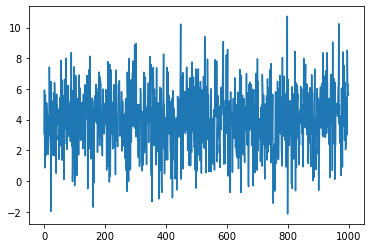

In [18]:
plt.plot(x)

(array([  7.,  38.,  94., 172., 249., 219., 148.,  56.,  14.,   3.]),
 array([-2.14330154, -0.85516364,  0.43297426,  1.72111216,  3.00925006,
         4.29738796,  5.58552586,  6.87366375,  8.16180165,  9.44993955,
        10.73807745]),
 <BarContainer object of 10 artists>)

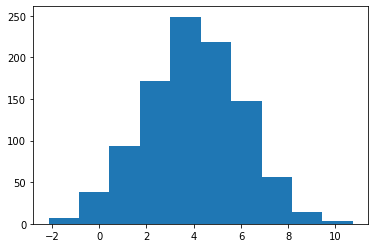

In [19]:
plt.hist(x)

In [11]:
with pm.Model() as model_1:
    #define your priors
    mean = pm.Uniform('μ', lower = 0, upper = 10)
    sd = pm.Uniform('σ', lower = 1, upper = 10)
    #defining the likelihood
    y = pm.Normal('y', mu = mean, sd = sd, observed = x)
    
    trace = pm.sample(1000)
    
    

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


In [12]:
import arviz as az

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'μ'}>,
        <AxesSubplot:title={'center':'μ'}>],
       [<AxesSubplot:title={'center':'σ'}>,
        <AxesSubplot:title={'center':'σ'}>]], dtype=object)

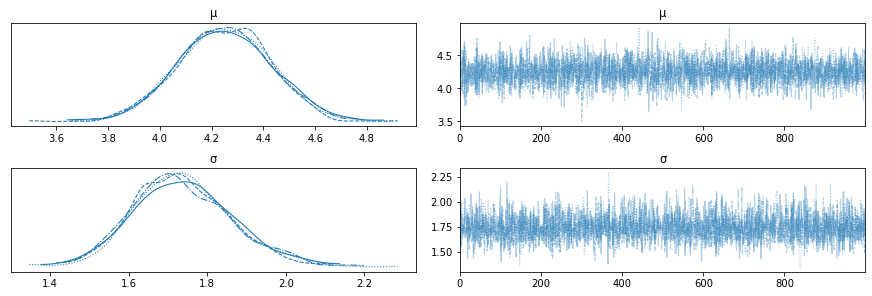

In [13]:
az.plot_trace(trace)

In [14]:
trace['μ'].mean()

4.24990558036949

In [15]:
trace['σ'].mean()

1.7378397757898292

### A Better Model?

In [20]:
with pm.Model() as model_2:
    μ = pm.Normal('μ', mu = 4.3, sd = 0.4)
    σ = pm.HalfNormal('σ', sd = 8)
    
    y = pm.Normal('y', mu = μ, sd = σ, observed = x)
    
    trace = pm.sample(2000)

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 11 seconds.


/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'μ'}>,
        <AxesSubplot:title={'center':'μ'}>],
       [<AxesSubplot:title={'center':'σ'}>,
        <AxesSubplot:title={'center':'σ'}>]], dtype=object)

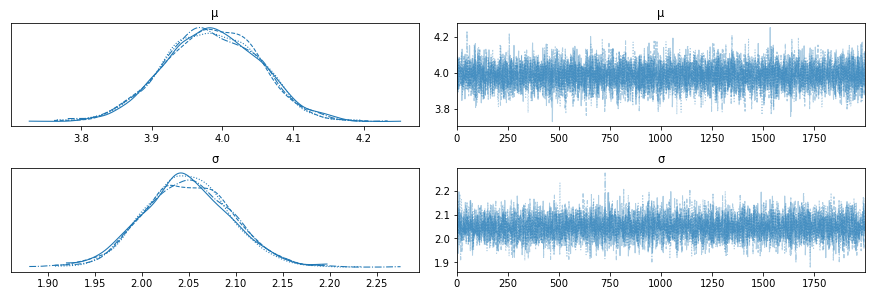

In [21]:
az.plot_trace(trace)

In [22]:
trace['μ'].mean()

3.9848057651187405

In [23]:
trace['σ'].mean()

2.048421364724347

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'μ'}>,
       <AxesSubplot:title={'center':'σ'}>], dtype=object)

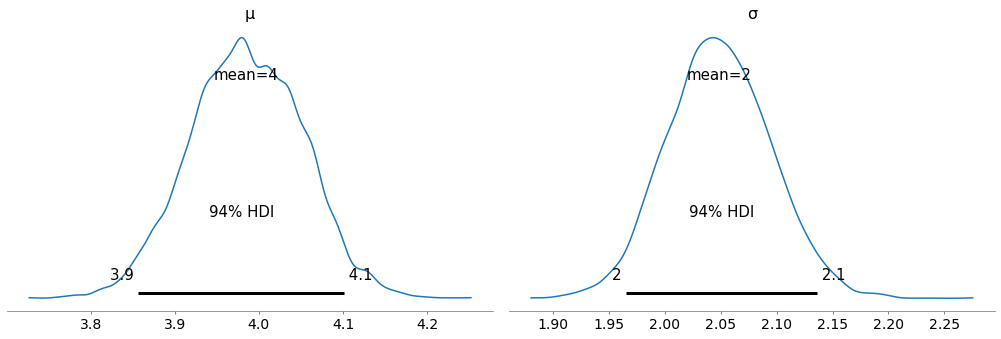

In [24]:
az.plot_posterior(trace)

### Coin Flip

In [33]:
coin_flips = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

In [34]:
with pm.Model() as coin_flip:
    p = pm.Beta('p', alpha = 1, beta = 1)
    y = pm.Bernoulli('y', p = p, observed = coin_flips)
    
    trace = pm.sample(1000)

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

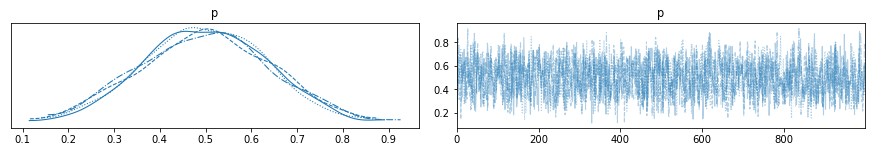

In [35]:
az.plot_trace(trace)

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'p'}>

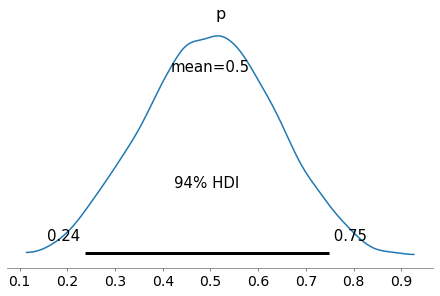

In [36]:
az.plot_posterior(trace)

### Bayesian Hypothesis Testing -- A/B tests

In [39]:
email_1 = np.random.binomial(20, .4, size = 20)
email_2 = np.random.binomial(20, 0.2, size = 20)

In [40]:
email_1

array([10,  9,  8,  8, 11,  5, 10,  5, 12,  7,  8,  8,  8,  8,  6, 10,  5,
        8,  7,  8])

In [41]:
email_2

array([6, 6, 3, 4, 4, 6, 4, 4, 3, 5, 3, 4, 3, 5, 1, 2, 1, 6, 4, 2])

In [45]:
with pm.Model() as model: 
    μ1 = pm.Normal('μ1', mu = 5, sd = 3)
    μ2 = pm.Normal('μ2', mu = 5, sd = 3)
    
    σ1 = pm.HalfNormal('σ1', sd = 5)
    σ2 = pm.HalfNormal('σ2', sd = 5)
    
    treatment = pm.Normal('email_1', mu = μ1, sd = σ1, observed = email_1)
    control = pm.Normal('email_2', mu = μ2, sd = σ2, observed = email_2)
    
    difference = pm.Deterministic('difference', treatment - control)
    
    trace = pm.sample(1000)

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ2, σ1, μ2, μ1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'μ1'}>,
       <AxesSubplot:title={'center':'μ2'}>], dtype=object)

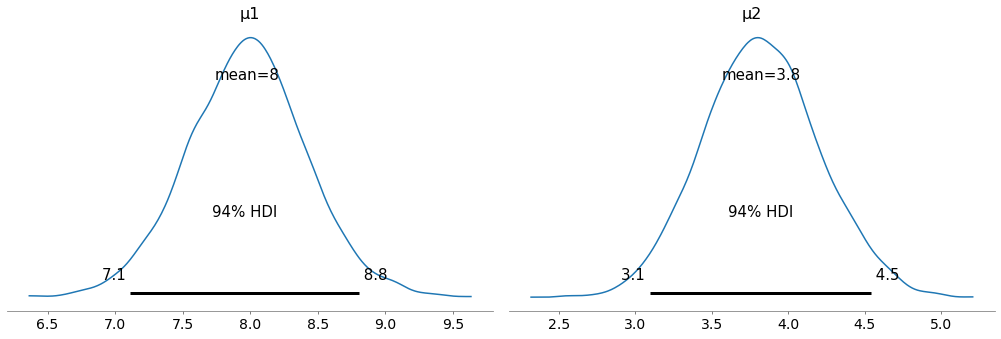

In [46]:
az.plot_posterior(trace, var_names = ['μ1', 'μ2'])

### A Regression Model

In [49]:
x = np.linspace(0, 10, 100)

In [54]:
def f(x): 
    return 4*x + 7 + 10*np.sin(3.5*x) + np.random.randn(100)

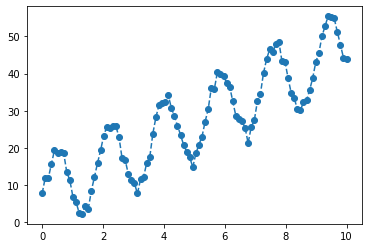

In [55]:
plt.plot(x, f(x), '--o')

In [56]:
with pm.Model() as lr:
    σ = pm.HalfNormal('σ', sd = 10)
    slope = pm.Uniform('slope', lower = -2, upper = 10)
    intercept = pm.Uniform('intercept', lower = 0, upper = 20)
    
    line = slope*x + intercept
    
    y = pm.Normal('y', mu = line, sd = σ, observed = f(x))
    
    trace = pm.sample(1000)

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, slope, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
The acceptance probability does not match the target. It is 0.8974758104001234, but should be close to 0.8. Try to increase the number of tuning steps.


/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'σ'}>,
        <AxesSubplot:title={'center':'σ'}>],
       [<AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'slope'}>],
       [<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'intercept'}>]], dtype=object)

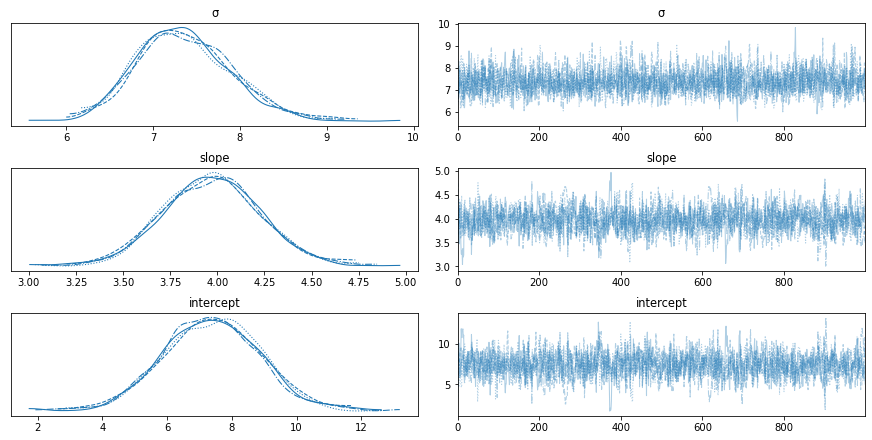

In [57]:
az.plot_trace(trace)

In [58]:
trace['slope'].mean()

3.9704491473558

In [59]:
trace['intercept'].mean()

7.37571939590005

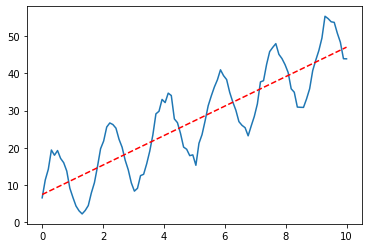

In [60]:
plt.plot(x, f(x))
plt.plot(x, trace['slope'].mean()*x +  trace['intercept'].mean(), '--r')

In [66]:
with pm.Model() as lr:
    σ = pm.HalfNormal('σ', sd = 10)
    slope = pm.Uniform('slope', lower = -2, upper = 10)
    intercept = pm.Uniform('intercept', lower = 0, upper = 20)
    amp = pm.Uniform('amp', lower = 0, upper = 20)
    scaler = pm.Uniform('scaler', lower = 0, upper = 10)
    
    line = slope*x + intercept + amp*np.sin(scaler*x)
    
    y = pm.Normal('y', mu = line, sd = σ, observed = f(x))
    
    trace = pm.sample(1000)

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [scaler, amp, intercept, slope, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


In [67]:
amp = trace['amp'].mean()
slope = trace['slope'].mean()
intercept = trace['intercept'].mean()
scaler = trace['scaler'].mean()

In [68]:
def l(x): return slope*x + intercept + amp*np.sin(scaler*x)

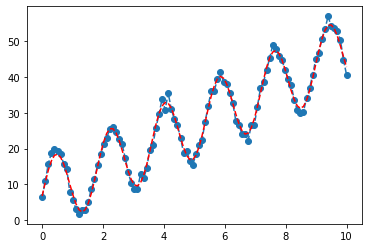

In [69]:
plt.plot(x, f(x), '--o')
plt.plot(x, l(x), '--r')

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'σ'}>,
        <AxesSubplot:title={'center':'σ'}>],
       [<AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'slope'}>],
       [<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'intercept'}>],
       [<AxesSubplot:title={'center':'amp'}>,
        <AxesSubplot:title={'center':'amp'}>],
       [<AxesSubplot:title={'center':'scaler'}>,
        <AxesSubplot:title={'center':'scaler'}>]], dtype=object)

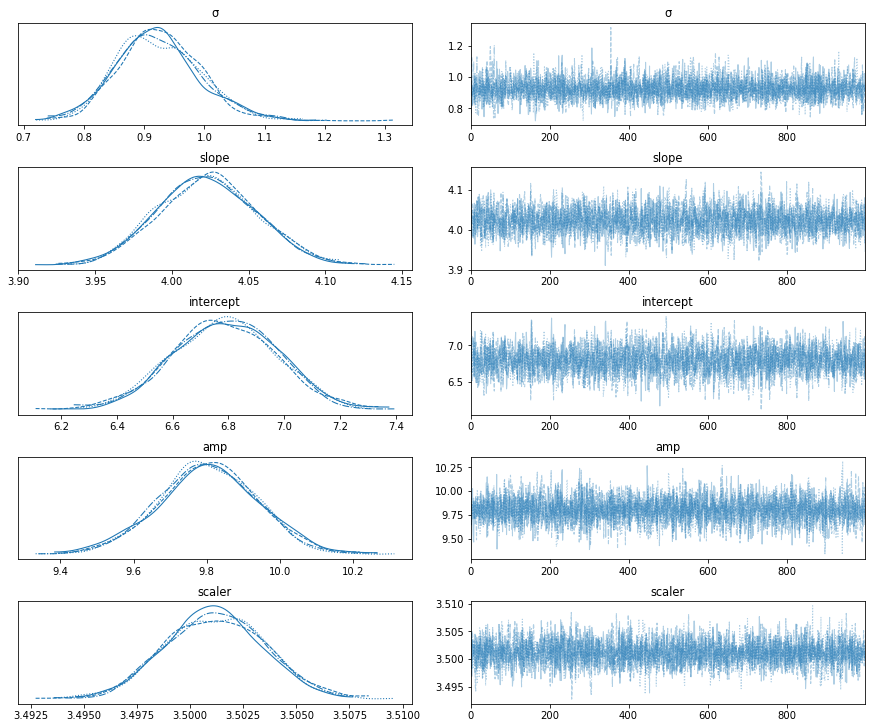

In [70]:
az.plot_trace(trace)

In [73]:
%psource f

def f(x): 
    return 4*x + 7 + 10*np.sin(3.5*x) + np.random.randn(100)


In [ ]:
X, y = linear_training_data()

with pm.Model() as linear_model:
    weights = pm.Normal("weights", mu=0, sigma=1)
    noise = pm.Gamma("noise", alpha=2, beta=1)
    y_observed = pm.Normal(
        "y_observed",
        mu=X @ weights,
        sigma=noise,
        observed=y,
    )

    prior = pm.sample_prior_predictive()
    posterior = pm.sample()
    posterior_pred = pm.sample_posterior_predictive(posterior)